# Thông tin sinh viên

**Họ tên**: Dương Trường Bình

**MSSV**: 21127229

# Thuật toán sử dụng bình phương tối thiểu OLS (Ordinary Least Square)
Đối với mô hình tuyến tính: $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

1. Tạo ma trận A và B từ dữ liệu đầu vào

    - A: Ma trận giá trị của các đặc trưng, mỗi cột là một đặc trưng , mỗi hàng là một điểm dữ liệu, ví dụ $x_{ij}$ là giá trị của đặc trưng thứ j của điểm dữ liệu thứ i
    - B: Ma trận cột giá trị của biến mục tiêu, mỗi hàng là một điểm dữ liệu
    
    $A = \begin{bmatrix}
    1 & x_{11} & x_{12} & ... & x_{1n} \\
    1 & x_{21} & x_{22} & ... & x_{2n} \\
    ... & ... & ... & ... & ... \\
    1 & x_{m1} & x_{m2} & ... & x_{mn} \\
    \end{bmatrix}$,    $B = \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_m \\
    \end{bmatrix}$

2. Tính ma trận hệ số x_hat chứa các $\theta$

    $\hat x =\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    ... \\
    \theta_n \\
    \end{bmatrix} = (A^TA)^{-1}A^TB$

3. Tính giá trị dự đoán $\hat y$ từ ma trận hệ số x_hat

    $\hat y = \begin{bmatrix}
    \hat y_1 \\
    \hat y_2 \\
    ... \\
    \hat y_m \\
    \end{bmatrix} = A\hat x$

4. Tính vector phần dư và chuẩn vector phần dư $r$ để đánh giá mô hình

    $r = \begin{bmatrix}
    r_1 \\
    r_2 \\
    ... \\
    r_m \\
    \end{bmatrix} = \begin{bmatrix}
    y_1 - \hat y_1 \\
    y_2 - \hat y_2 \\
    ... \\
    y_m - \hat y_m \\
    \end{bmatrix} = B - \hat y$

    $||r|| = \sqrt{r_1^2 + r_2^2 + ... + r_m^2}$

Đối với các mô hình khác, ma trận A và B sẽ được tính theo công thức tương ứng.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
def dot_product(x, y):
    return sum([x[i] * y[i] for i in range(len(x))])
def dot_matrix(x, y):
    new_matrix = []
    for i in range(len(x)):
        temp = []
        for j in range(len(y[0])):
            y_j = [y[k][j] for k in range(len(y))]
            temp.append(dot_product(x[i], y_j))
        new_matrix.append(temp)
    return new_matrix
            
def norm(x):
    return sum([x[i] ** 2 for i in range(len(x))]) ** 0.5
def transpose(x):
    return [[x[j][i] for j in range(len(x))] for i in range(len(x[0]))]
def inverse(matrix):

    size = len(matrix)

    matrix = [matrix[i] + [1 if i ==
                           j else 0 for j in range(size)] for i in range(size)]

    for index in range(size):

        if matrix[index][index] == 0:
            for i in range(index + 1, size):
                if matrix[i][index] != 0:
                    matrix[index], matrix[i] = matrix[i], matrix[index]
                    break

            else:
                index += 1

        factor = matrix[index][index]
        matrix[index] = [i / factor for i in matrix[index]]

        for i in range(size):
            if i != index:
                matrix[i] = [matrix[i][j] - matrix[i][index] *
                             matrix[index][j] for j in range(size * 2)]

    result = [row[size:] for row in matrix]

    return result

Ta xem xét các mô hình sau:
- $y= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$
- $ ln(y) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \cdots + \theta_n x_n $
- $ \frac{1}{ln(y)} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \cdots + \theta_n x_n $
- $y^{exp} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$


In [3]:
models_tostr = ['linear', 'ln', 'ln^-1', 'exp']

In [4]:
# Mô hình y = theta0 + theta1*x1 + theta2*x2 + ... + thetan*xn
def getAb_linear(x, y):
    A = [[1]+values for values in x]
    # Change y to column vector
    b = [[value] for value in y]
    return A, b


def model_linear(x, theta):
    return sum([theta[i][0]*x[i] for i in range(len(theta))])


# Mô hình lny = theta0 + theta1*x1 + theta2*x2 + ... + thetan*xn
def model_log(x, theta):
    e = math.e
    values = [theta[i][0] * x[i] for i in range(len(x))]
    return e ** sum(values)


def getAb_log(x, y):
    A = [[1] + values for values in x]
    b = [[math.log(value)] for value in y]
    return A, b

# Mô hình 1/lny = theta0 + theta1*x1 + theta2*x2 + ... + thetan*xn


def model_reverse_log(x, theta):
    e = math.e
    values = [theta[i][0] * x[i] for i in range(len(x))]
    return e ** (1/sum(values))


def getAb_reverse_log(x, y):
    A = [[1] + values for values in x]
    b = [[1/math.log(value)] for value in y]
    return A, b

# Mô hình y^exp = theta0 + theta1*x1 + theta2*x2 + ... + thetan*xn


def getAb_exp(x, y, exp):
    A = [[1]+values for values in x]
    b = [[value**exp] for value in y]
    return A, b


def model_exp(x, theta, exp):
    return sum([theta[i][0]*x[i] for i in range(len(theta))])**(1/exp)

# Hàm để gọi các hàm model
def getAb(function, *kwargs):
    return function(*kwargs)


def model(function, *kwargs):
    return function(*kwargs)

In [5]:
def data_fitting(x, y, model_function, getAb_function, *args):

    r_norm, x_hat, y_hat = 0, 0, 0

    if args == ():
        A, b = getAb(getAb_function, x, y)

        x_hat = dot_matrix(inverse(dot_matrix(transpose(A), A)),
                           dot_matrix(transpose(A), b))

        y_hat = [model(model_function, value, x_hat) for value in A]
        r_vector = [y_hat[i] - y[i] for i in range(len(b))]
        r_norm = norm(r_vector)
    else:
        exp = args[0]
        A, b = getAb_exp(x, y, exp)
        x_hat = dot_matrix(inverse(dot_matrix(transpose(A), A)),
                           dot_matrix(transpose(A), b))
        y_hat = [model_exp(value, x_hat, exp) for value in A]
        r_vector = [y_hat[i] - y[i] for i in range(len(b))]
        r_norm = norm(r_vector)
    return r_norm, x_hat, y_hat

# Đọc và tìm hiểu dữ liệu

In [6]:
df = pd.read_csv('wine.csv')
# Remove the double quotes from the column names
df.columns = df.columns.str.replace('"', '')
df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4


In [7]:
df.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,5.664721,8.625271,0.519133,0.293353,2.564470,0.089266,15.242702,46.884070,0.997059,3.298582,0.665738,10.383069
std,0.809593,1.781795,0.179208,0.196751,1.264441,0.048310,10.210406,33.949177,0.001878,0.156161,0.175921,1.091891
min,3.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.996000,3.195000,0.560000,9.500000
50%,6.000000,8.300000,0.500000,0.290000,2.200000,0.080000,13.000000,38.000000,0.997020,3.300000,0.620000,10.000000
75%,6.000000,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998175,3.390000,0.735000,11.000000
max,8.000000,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1199 non-null   int64  
 1   fixed acidity         1199 non-null   float64
 2   volatile acidity      1199 non-null   float64
 3   citric acid           1199 non-null   float64
 4   residual sugar        1199 non-null   float64
 5   chlorides             1199 non-null   float64
 6   free sulfur dioxide   1199 non-null   float64
 7   total sulfur dioxide  1199 non-null   int64  
 8   density               1199 non-null   float64
 9   pH                    1199 non-null   float64
 10  sulphates             1199 non-null   float64
 11  alcohol               1199 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 112.5 KB


# Câu a: Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.

## Mô hình $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{11} x_{11}$

In [9]:
y = df['quality'].to_list()
# x is all the other columns
x = df.drop('quality', axis=1).to_numpy().tolist()

r_norm, x_hat, y_hat = data_fitting(x, y, model_linear,getAb_linear)
print('Model with 11 features: ')
for i in range(len(x_hat)):
    print(f'theta{i} = {x_hat[i]}')


print('The norm of the residual vector is: ', r_norm)
print('Predicted wine quality is: ', y_hat)

Model with 11 features: 
theta0 = [42.91716229850135]
theta1 = [0.047524752901409784]
theta2 = [-1.0687425805237893]
theta3 = [-0.26871082850902894]
theta4 = [0.03497426611090759]
theta5 = [-1.5972956048661757]
theta6 = [0.0034878813769227413]
theta7 = [-0.0037983550574801073]
theta8 = [-39.46908087476913]
theta9 = [-0.24557590899883053]
theta10 = [0.7738407941200194]
theta11 = [0.26937749583453297]
The norm of the residual vector is:  22.094716807791652
Predicted wine quality is:  [5.096283894559142, 5.151955742868704, 5.237204120626642, 5.700324694002205, 5.096283894559142, 5.121319099182833, 5.15992289252559, 5.449137948835042, 5.41123754515315, 5.656895709180418, 5.091052093005293, 5.656895709180418, 5.217492452016445, 5.844590142383871, 5.080939609820449, 5.112687035842297, 5.769961550374535, 5.332333643315141, 5.158894844306173, 5.399173207957877, 5.556239142083543, 5.391735589256742, 5.707524132870537, 5.312078401590213, 5.564822190243751, 5.455817764884196, 5.574079944178591, 5

Vậy sử dụng 11 đặc trưng đề bài cung cấp ta xây dựng mô hình $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{11} x_{11}$ có chuẩn vector phần dư là 22.0947

# Câu b: Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.

Ta sẽ sử dụng mô hình $y = \theta_0 +\theta_1 x$ với x là 1 trong 11 đặc trưng để tìm ra đặc trưng cho kết quả tốt nhất

Feature: fixed acidity, RSS: 27.708776606551716


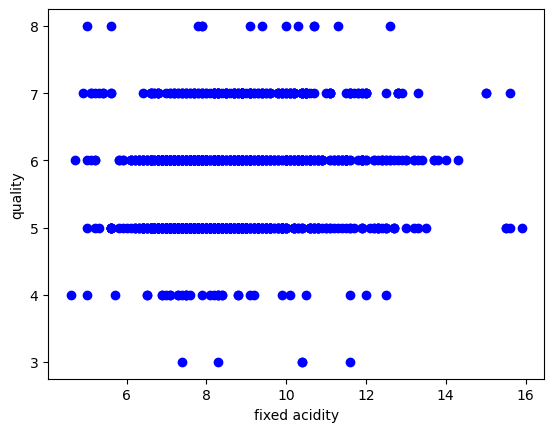

Feature: volatile acidity, RSS: 25.921046257502873


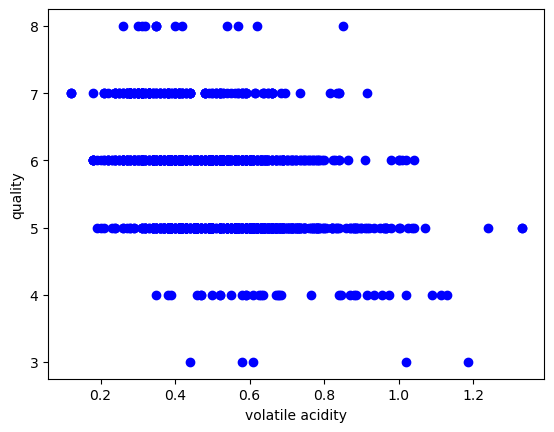

Feature: citric acid, RSS: 27.282326096001288


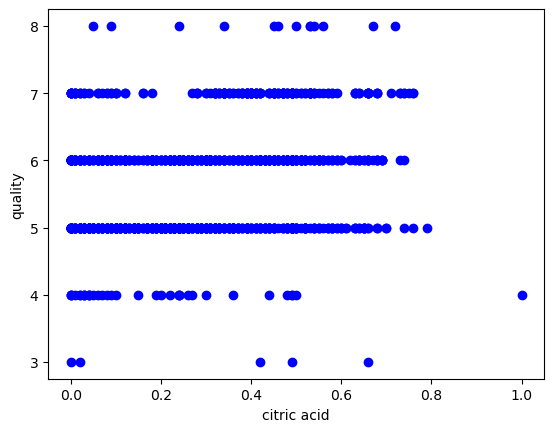

Feature: residual sugar, RSS: 27.988047661119897


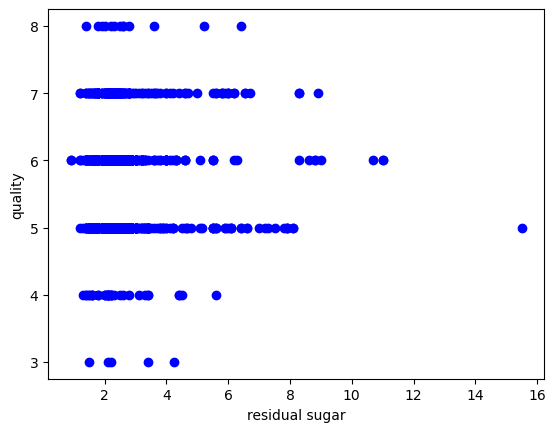

Feature: chlorides, RSS: 27.80382915794737


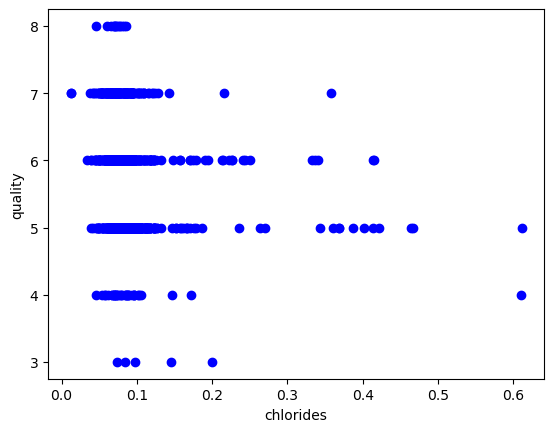

Feature: free sulfur dioxide, RSS: 27.942875473161088


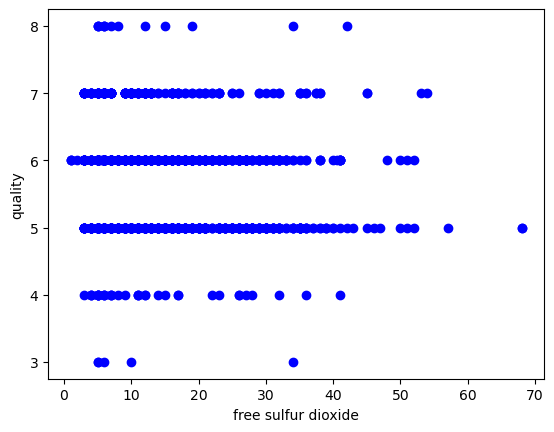

Feature: total sulfur dioxide, RSS: 27.29098207266505


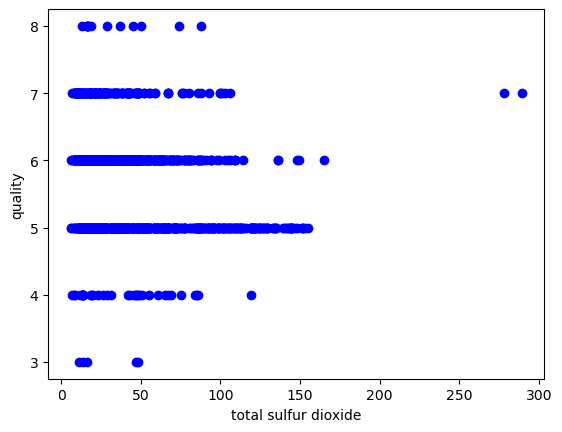

Feature: density, RSS: 27.497840577708843


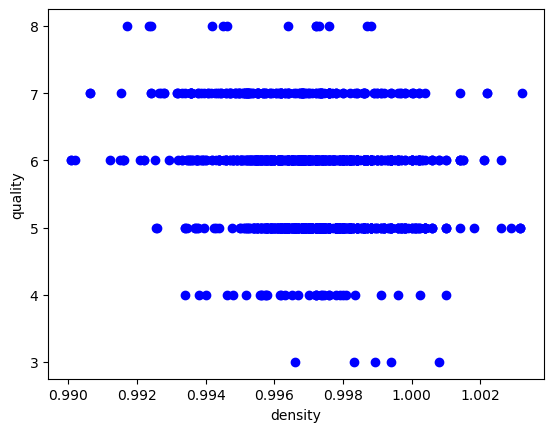

Feature: pH, RSS: 27.941408153675535


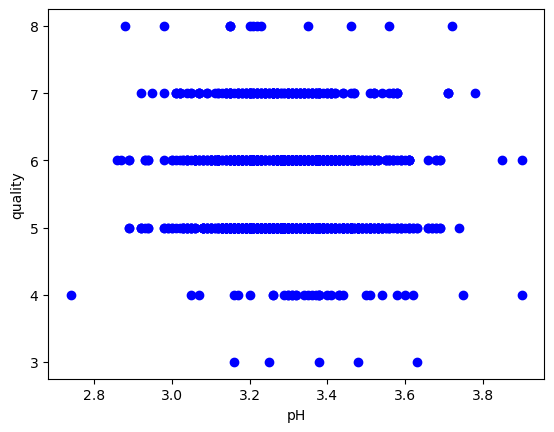

Feature: sulphates, RSS: 27.388550316050463


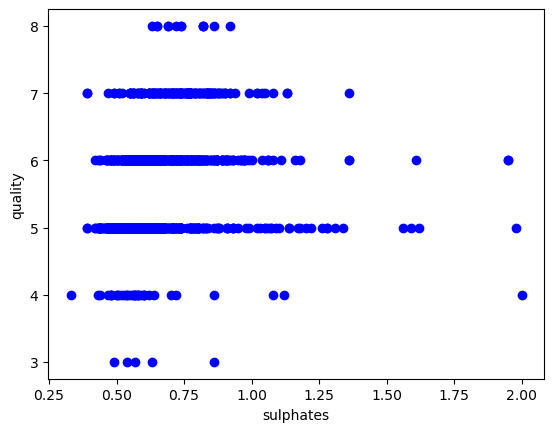

Feature: alcohol, RSS: 24.180052775014154


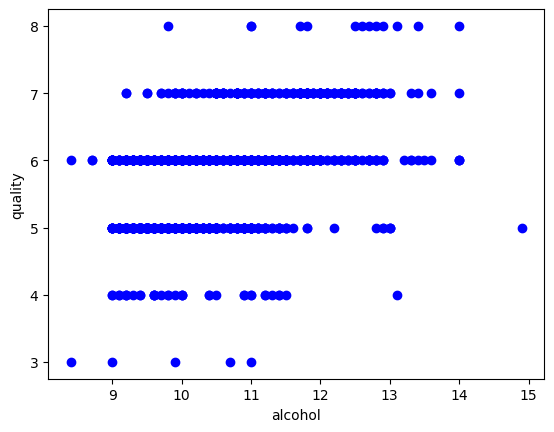

Best feature: alcohol
Min RSS: 24.180052775014154


In [10]:
norm_of_feature = []

y = df['quality'].to_list()
df_new = df.drop('quality', axis=1)
for feature in df_new.columns:
    x = df_new[feature].to_list()
    x = [[x[i]] for i in range(len(x))]
    r_norm, x_hat, y_hat = data_fitting(x, y, model_linear,getAb_linear)
    norm_of_feature.append(r_norm)
    print(f"Feature: {feature}, RSS: {r_norm}")

    x_hat_value = [x[0] for x in x_hat]

    plt.plot(x, y, "o", color="blue")
    plt.xlabel(feature)
    plt.ylabel("quality")
    plt.show()
min_norm = min(norm_of_feature)
best_feature = norm_of_feature.index(min_norm)
print(f"Best feature: {df_new.columns[best_feature]}")
print(f"Min RSS: {min_norm}")

Dựa vào các biểu đồ trên, chúng ta nhận thấy:
- Đặc trưng `alcohol` có mối tương quan rõ rệt với `quality`, được thể hiện qua hình dạng biểu đồ, mật độ của các điểm dữ liệu và giá trị RSS.
- Đặc trưng `volatile acidity` cũng có mối tương quan với `quality` nhưng không rõ ràng bằng `alcohol`, điều này cũng phản ánh qua giá trị RSS của nó.
- Các đặc trưng còn lại không thể hiện mối tương quan rõ rệt với `quality` bằng `alcohol` và `volatile acidity`.

Tiếp theo ta trực quan các giá trị RSS của các mô hình ứng với các đặc trưng để tìm ra đặc trưng cho kết quả tốt nhất

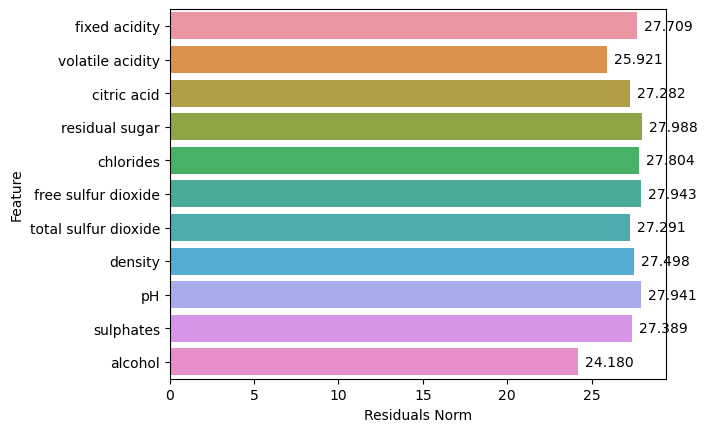

In [11]:
# Visualize bar chart horizontal
fig, ax = plt.subplots()
sns.barplot(y=df_new.columns, x=norm_of_feature, orient='h', ax=ax)
ax.set_ylabel('Feature')
ax.set_xlabel('Residuals Norm')
# Giúp hiển thị các giá trị OLS lên biểu đồ
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()

Dựa vào các biểu đồ và kết quả ở trên có thể thấy đặc trưng `alcohol` có giá trị RSS nhỏ nhất nên cũng chính là đặc trưng tốt nhất

In [12]:
y = df['quality'].to_list()
df_new = df.drop('quality', axis=1)

x = df_new['alcohol'].to_list()
x = [[x[i]] for i in range(len(x))]
r_norm, x_hat, y_hat = data_fitting(x, y, model_linear,getAb_linear)

print('Sử dụng đặc trưng alcohol')
print('Norm of residual: ', r_norm)
print('Mô hình: y = ', y_hat[0], ' + ', y_hat[1], 'x')
print('Chất lượng rượu được đánh giá:')
print(y_hat)

Sử dụng đặc trưng alcohol
Norm of residual:  24.180052775014154
Mô hình: y =  5.296354272529541  +  5.446238459256321 x
Chất lượng rượu được đánh giá:
[5.296354272529541, 5.446238459256321, 5.446238459256321, 5.446238459256321, 5.296354272529541, 5.296354272529541, 5.296354272529541, 5.521180552619711, 5.333825319211236, 5.708535786028186, 5.221412179166151, 5.708535786028186, 5.483709505938016, 5.183941132484456, 5.221412179166151, 5.221412179166151, 5.708535786028186, 5.258883225847846, 5.146470085802761, 5.221412179166151, 5.296354272529541, 5.408767412574626, 5.333825319211236, 5.296354272529541, 5.408767412574626, 5.258883225847846, 5.333825319211236, 5.333825319211236, 5.296354272529541, 5.446238459256321, 5.558651599301406, 5.746006832709881, 5.446238459256321, 5.296354272529541, 5.221412179166151, 5.371296365892931, 5.820948926073271, 5.408767412574626, 5.446238459256321, 5.708535786028186, 5.708535786028186, 5.258883225847846, 5.708535786028186, 5.633593692664796, 5.3338253192

# Câu c: Xây dựng một mô hình cho kết quả tốt nhất

## Trực quan mối tương quan giữa các đặc trưng

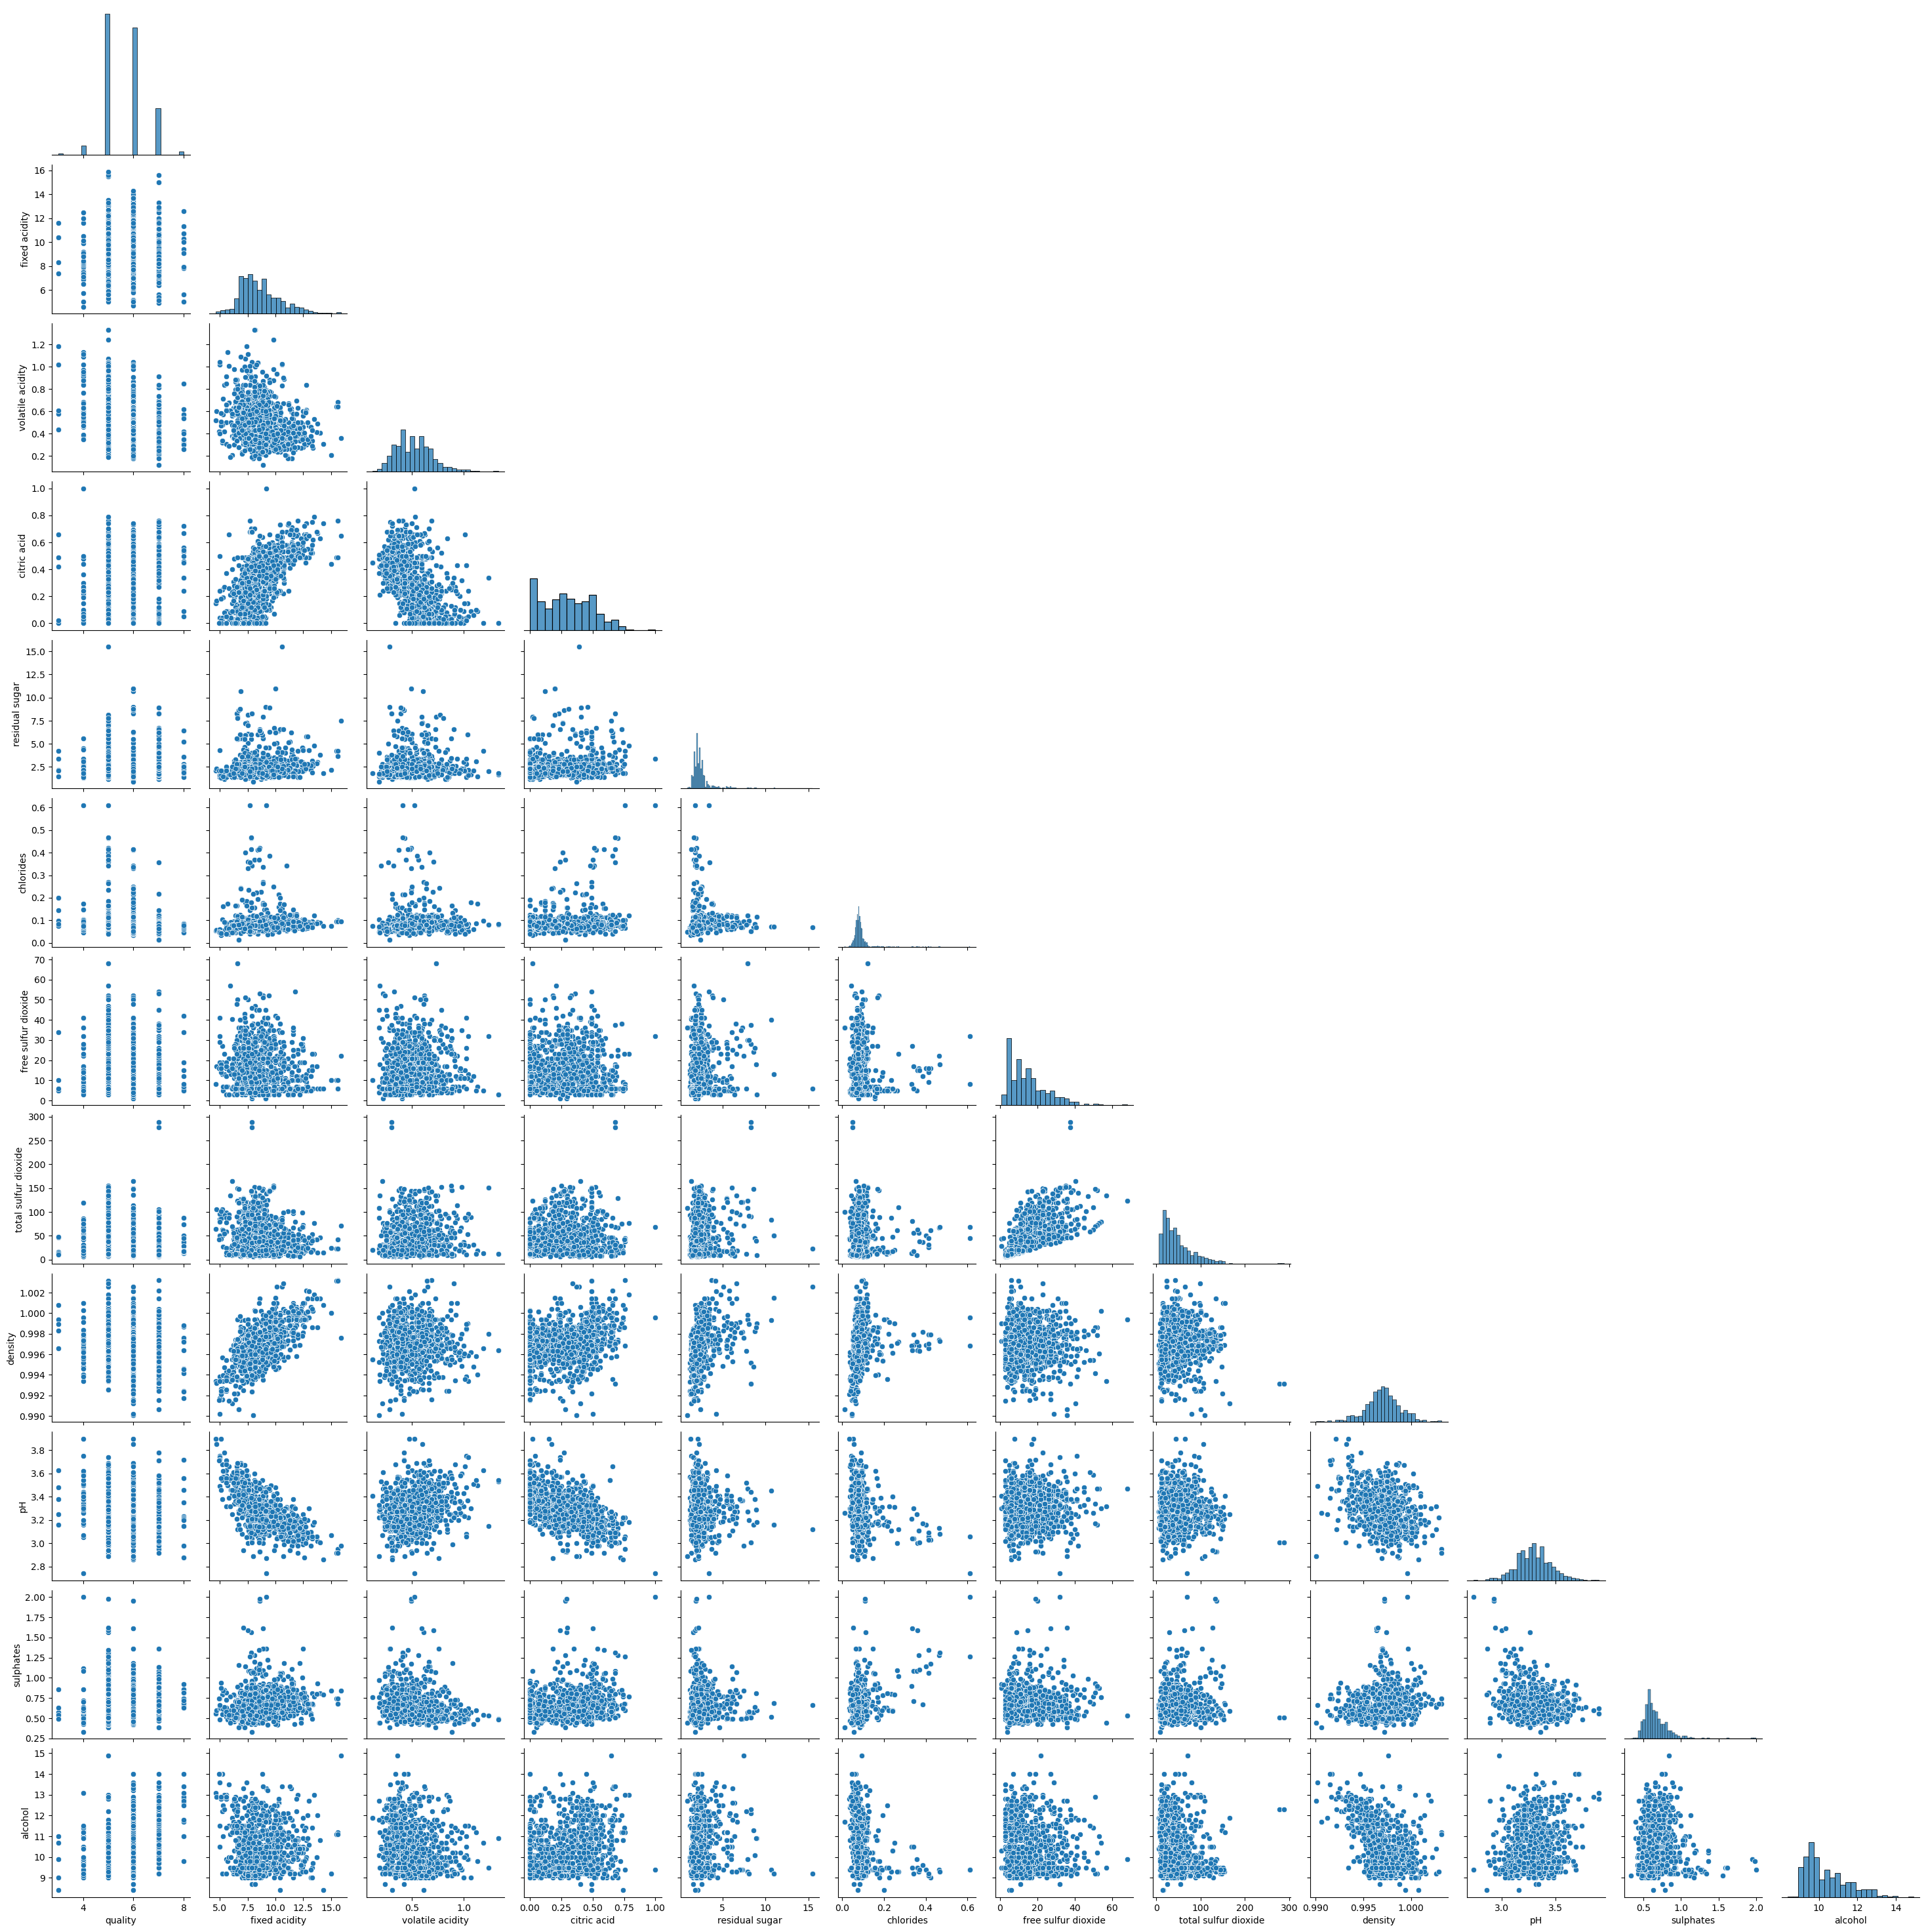

In [13]:

cols_for_pairplot = ['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

sns.pairplot(df[cols_for_pairplot],corner=True)
plt.show()

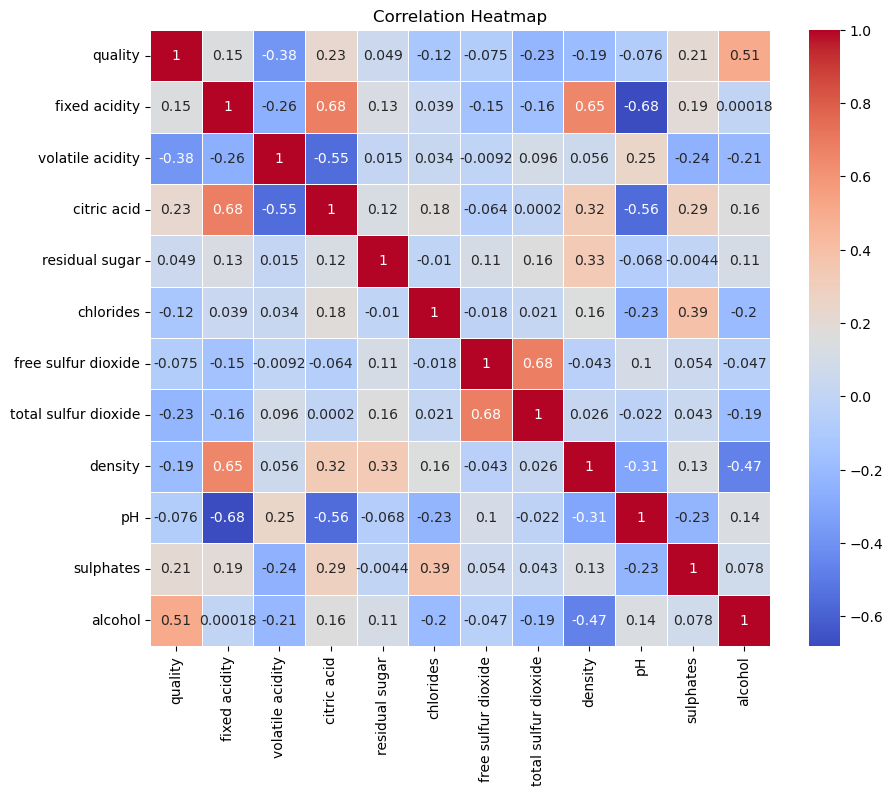

In [14]:
# Tính ma trận tương quan giữa các đặc trưng
corr_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Có sự tương quan giữa các đặc trưng với nhau (chỉ số tương quan > 0.6) như sau:
- *citric acid* và *fixed acidity* 
- *total sulfur dioxide* và *free sulfur dioxide*
- *density* và *fixed acidity*
- *pH* và *fixed acidity*

## Loại bỏ các đặc trưng có sự tương quan

Vì các đặc trưng có sự tương quan nên ta sẽ giảm bớt số đặc trưng cho mô hình, xóa bớt các đặc trưng có tương quan với nhau để xem kết quả có tốt hơn không.

=> Ta thử xóa đặc trưng `citric acid`, `pH`, `density` và `free sulfur dioxide`

In [15]:
y = df['quality'].to_list()
df_new = df.drop('quality', axis=1)

x = df_new.drop(['citric acid',  'free sulfur dioxide', 'density', 'pH'], axis=1).to_numpy().tolist()

r_norm, x_hat, y_hat = data_fitting(x, y, model_linear,getAb_linear)
print('r_norm =', r_norm)

r_norm = 22.213696350547075


Ta thấy sau khi bỏ các đặc trưng trên giá trị RSS mô hình đã tăng lên (mô hình giảm sự chính xác hơn so với ban đầu 22.21>22.09)

Ta nhận xét: Có thể trong bộ dữ liệu này càng sử dụng nhiều đặc trưng sẽ giúp mô hình tốt hơn

Ta sẽ dùng các mô hình đề cập ở đầu bài (linear,ln-linear...) và sử dụng lần lượt k đặc trưng (1<=k<=11) để so sánh kết quả

## Sử dụng các mô hình và các đặc trưng để tìm ra mô hình tốt nhất có thể

Đầu tiên với mô hình $y^{exp} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$ ta cần tìm một hệ số mũ `exp` cụ thể thì mới có thể chạy mô hình và so sánh.

Ta sẽ xem xét và tìm `exp` tốt nhất có thể

### Tìm xấp xỉ cho mô hình $y^{exp} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_{11}x_{11}$

- Ta tìm xấp xỉ hệ số mũ `exp` làm cho RSS nhỏ nhất 
- Ban đầu ta cho hệ số mũ `exp` trong khoảng từ -3 đến 3 để quan sát

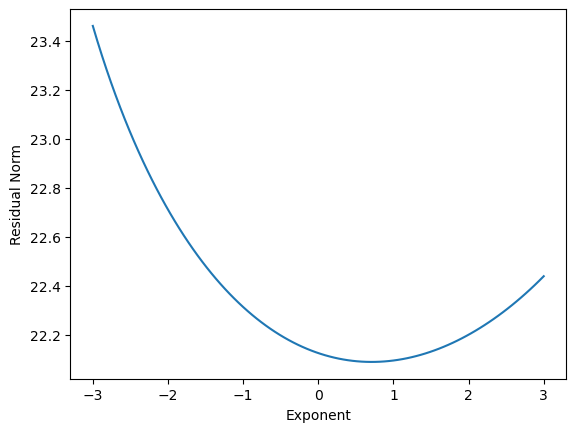

In [16]:
ols_exp = []
y = df['quality'].to_list()
# x is all the other columns
x = df.drop('quality', axis=1).to_numpy().tolist()
for exp in np.linspace(-3, 3, 100):
    if exp == 0:
        continue
    
    A, b = getAb_exp(x, y, exp)

    # x_hat = (A^T A)^-1 A^T b
    x_hat = dot_matrix(inverse(dot_matrix(transpose(A), A)),
                       dot_matrix(transpose(A), b))

    y_hat = [model_exp(value, x_hat, exp) for value in A]

    r_vector = [y_hat[i] - y[i] for i in range(len(y))]
    r_norm = norm(r_vector)
    ols_exp.append(r_norm)

plt.plot(np.linspace(-3, 3, 100), ols_exp)
plt.xlabel('Exponent')
plt.ylabel('Residual Norm')

plt.show()

- Ta thấy giá trị `exp` làm cho RSS đạt cực tiểu nằm trong khoảng (0,1) nên ta sẽ từ từ thu hẹp khoảng giá trị để tìm giá trị `exp` xấp xỉ tốt nhất
- Và sau vài bước ta thu hẹp được đến khoảng (0.65,0.75) và ta sẽ xem xét trong khoảng này để tìm giá trị `exp` xấp xỉ tốt nhất cho RSS nhỏ nhất

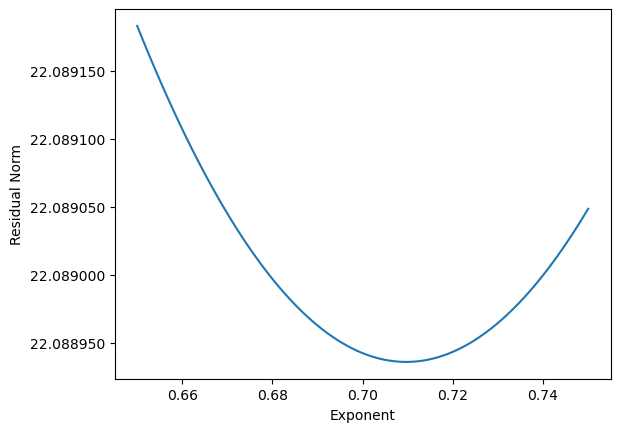

Best exponent: 0.7095959595959596 with RSS: 22.088935892092785


In [17]:
from matplotlib.ticker import FormatStrFormatter
ols_exp = []
best_exp = 0
y = df['quality'].to_list()
# x is all the other columns
x = df.drop('quality', axis=1).to_numpy().tolist()
for exp in np.linspace(0.65, 0.75, 100):
    if exp == 0:
        continue
    
    A, b = getAb_exp(x, y, exp)

    # x_hat = (A^T A)^-1 A^T b
    x_hat = dot_matrix(inverse(dot_matrix(transpose(A), A)),
                       dot_matrix(transpose(A), b))

    y_hat = [model_exp(value, x_hat, exp) for value in A]

    r_vector = [y_hat[i] - y[i] for i in range(len(y))]
    r_norm = norm(r_vector)
    ols_exp.append(r_norm)
    if r_norm <= min(ols_exp):
        best_exp = exp

plt.plot(np.linspace(0.65, 0.75, 100), ols_exp)
plt.xlabel('Exponent')
plt.ylabel('Residual Norm')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
plt.show()
print(f'Best exponent: {best_exp} with RSS: {min(ols_exp)}')

- Và sau vài lần thu hẹp thì ta có được giá trị `exp` xấp xỉ tốt nhất lưu trong biến `best_exp` là khoảng 0.7096


### Dùng các mô hình với k đặc trưng

Ta cho k chạy lần lượt từ 1 đến 11, với mỗi k đặc trưng ta tính RSS của mỗi mô hình. Sau đó, ta sẽ chọn ra mô hình tốt nhất có RSS thấp nhất 

Model: linear, Min OLS: 22.09472
Model: ln, Min OLS: 22.12508
Model: ln^-1, Min OLS: 22.37034
Model: exp, Min OLS: 22.08894


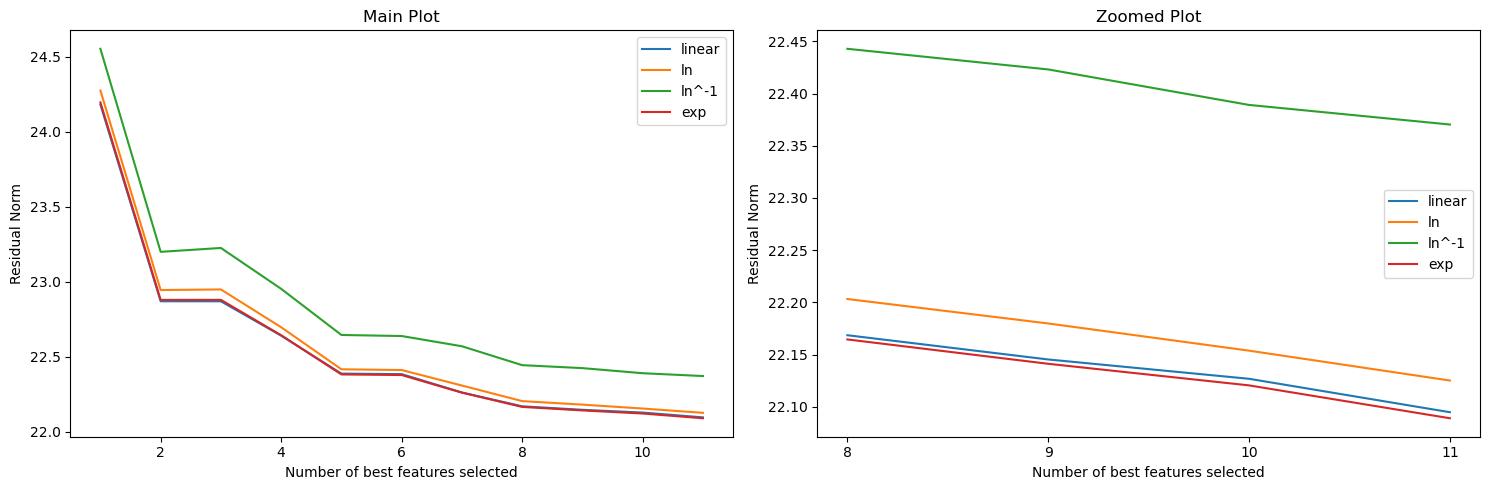

In [18]:
# Sắp xếp các feature theo thứ tự tốt giảm dần (tăng dần theo OLS)
df_features = {df.columns[i+1]: norm_of_feature[i]
               for i in range(len(norm_of_feature))}
df_features = sorted(df_features.items(), key=lambda x: x[1])
number_of_models = 4
# Mảng giá trị ols của các model với k feature tốt nhất
ols_features_model = [[] for i in range(number_of_models)]

getAb_models = [getAb_linear, getAb_log, getAb_reverse_log, getAb_exp]
models = [model_linear, model_log, model_reverse_log, model_exp]

for k in range(1, 12):
    features = [df_features[i][0] for i in range(k)]
    df_new = df[features]
    y = df['quality'].to_list()
    x = df_new.to_numpy().tolist()

    r_norm = 0
    for model_index in range(number_of_models-1):
        r_norm, x_hat, y_hat = data_fitting(x, y, models[model_index],getAb_models[model_index])
        ols_features_model[model_index].append(r_norm)

    # model y^exp = theta_0 + theta_1 * x_1 + ... + theta_k * x_k
    
    r_norm, x_hat, y_hat = data_fitting(x, y, model_exp,getAb_exp,best_exp)
    ols_features_model[number_of_models-1].append(r_norm)

# Vẽ biểu đồ trực quan chuẩn của vector phần dư của các mô hình với k feature tốt nhất

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Biểu đồ chính
for model_index in range(number_of_models):
    axs[0].plot(range(1, 12), ols_features_model[model_index],
                label=models_tostr[model_index])
    print(
        f'Model: {models_tostr[model_index]}, Min OLS: {min(ols_features_model[model_index]):0.5f}')
axs[0].legend()
axs[0].set_xlabel('Number of best features selected')
axs[0].set_ylabel('Residual Norm')
axs[0].set_title('Main Plot')

zoom_range = range(8, 12)
# Biểu đồ phóng to
for model_index in range(number_of_models):
    axs[1].plot(zoom_range, ols_features_model[model_index][zoom_range[0]-1:zoom_range[-1]],
                label=models_tostr[model_index])
axs[1].legend()
axs[1].set_xlabel('Number of best features selected')
axs[1].set_ylabel('Residual Norm')
axs[1].set_title('Zoomed Plot')
plt.xticks(zoom_range)
plt.tight_layout()
plt.show()

- Dựa vào đồ thị trên ta có thể đối với các mô hình trên, càng sử dụng nhiều feature thì độ chính xác của mô hình càng tăng lên (sai số càng giảm)

Vì vậy ta sử dụng tất cả 11 feature để tạo ra mô hình tốt nhất trong bộ dữ liệu này.

- Bên cạnh đó mô hình $y^{best\_exp} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_{11}x_{11}$ với best_exp xấp xỉ 0.7096 có giá trị RSS nhỏ nhất nên nó là mô hình tốt nhất trong các mô hình trên

Vậy mô hình tốt nhất có thể là $y^{best\_exp} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_{11}x_{11}$ với `best_exp` $\approx$ 0.7096

## Ý Tưởng Thực Hiện

Toàn bộ đồ án ta xem xét các mô hình:
- $y= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$
- $ ln(y) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \cdots + \theta_n x_n $
- $ \frac{1}{ln(y)} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \cdots + \theta_n x_n $
- $y^{exp} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$
### Câu a: Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.

Thực hiện phân tích chất lượng rượu bằng cách sử dụng các mô hình tuyến tính đa biến với toàn bộ 11 đặc trưng cung cấp:

- Mô hình: $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{11} x_{11}$

Các bước thực hiện:

1. Áp dụng thuật toán OLS để tìm ma trận $\hat{x}$ chứa các giá trị $\theta$.
2. Tính chuẩn của vector phần dư và chất lượng rượu mô hình đánh giá được $\hat{y}$.

### Câu b: Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất

Chúng ta sẽ thực hiện phân tích sâu hơn bằng cách sử dụng mô hình tuyến tính đơn biến với từng đặc trưng riêng lẻ:

- Mô hình: $y = \theta_0 + \theta_1 x$ 

với $x$ là một trong 11 đặc trưng được cung cấp.

Các bước thực hiện:

1. Làm theo thuật toán sử dụng OLS để tính norm của vector phần dư với mỗi đặc trưng
2. Trực quan các biểu đồ thể hiện sự tương quan giữa đặc trưng đó với `quality` để xem xét đặc trưng nào có tương quan cao nhất với `quality`
3. Trực quan norm của vector phần dư của mỗi đặc trưng
4. Dựa vào các biểu đồ và norm của vector phần dư, chọn ra đặc trưng tốt nhất.

### Câu c: Xây Dựng Mô Hình Riêng

1. Trực Quan Hóa Sự Tương Quan

Trước hết, chúng ta sẽ trực quan hóa sự tương quan giữa các đặc trưng và chất lượng rượu, bao gồm cả tương quan giữa các đặc trưng với nhau.

2. Loại Bỏ Đặc Trưng Tương Quan

Chúng ta thử loại bỏ các đặc trưng có sự tương quan với nhau để xem liệu mô hình có cải thiện không.

3. Xây Dựng Mô Hình Exponential

Chúng ta xây dựng mô hình $y^{exp} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{11}x_{11}$ và tìm giá trị exp tối ưu nhất để giảm norm của vector phần dư.

4. So Sánh Các Mô Hình

Chúng ta so sánh 4 mô hình  ở trên, sử dụng k đặc trưng tốt nhất (1 <= k <= 11). Đối với mỗi mô hình, tính toán norm của vector phần dư và trực quan hóa để tìm ra mô hình tốt nhất.

5. Kết Luận

Dựa trên các phân tích và so sánh, chúng ta có thể rút ra kết luận về mô hình tốt nhất có thể để đánh giá chất lượng rượu dựa trên đặc trưng được cung cấp.

# Mô tả các hàm

## dot_product
- Input: 2 vector x,y
- Output: Tích vô hướng của 2 vector x,y
- Hoạt động: Tính tổng của tích từng phần tử x[i] * y[i] với i chạy từ 0 đến len(x)-1 của 2 vector x,y

## dot_matrix
- Input: 2 matrix x,y
- Output: Ma trận tích của 2 matrix x,y
- Hoạt động: x (mxn) * y (nxp) = z (mxp) với z[i][j] = dot_product(x[i], y[j])

## norm
- Input: 1 vector x
- Output: Độ dài của vector x
- Hoạt động: Tính căn bậc 2 của tổng bình phương từng phần tử x[i] với i chạy từ 0 đến len(x)-1 của vector x

## transpose
- Input: 1 matrix x
- Output: Ma trận chuyển vị của matrix x
- Hoạt động: Chuyển vị các dòng thành cột và ngược lại

## inverse
- Input: 1 ma trận đầu vào
- Output: Ma trận nghịch đảo của ma trận đầu vào
- Hoạt động: Ghép ma trận đầu vào với ma trận đơn vị cùng cỡ, sau đó thực hiện phép biến đổi Gauss-Jordan để đưa ma trận đầu vào về ma trận đơn vị, ma trận ghép với ma trận đơn vị sau khi biến đổi sẽ là ma trận nghịch đảo của ma trận đầu vào

## getAb_linear
- Input:
    - x: Ma trận chứa dữ liệu của các đặc trưng, mỗi dòng là 1 điểm dữ liệu, mỗi cột là 1 đặc trưng
    - y: Vector chứa dữ liệu mục tiêu, mỗi phần tử là 1 điểm dữ liệu
- Output:
    - A: Ma trận x được thêm 1 cột 1 ở đầu
    - b: Ma trận chứa dữ liệu mục tiêu từ vector y
- Mục đích: Chuẩn bị ma trận A và b theo các bước trong thuật toán sử dụng OLS cho mô hình $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- Hoạt động:
    - Thêm 1 cột 1 vào đầu ma trận x để tạo ma trận A
    - Mỗi phần tử của vector y sẽ là 1 dòng của ma trận b

## model_linear
- Input:
    - x: Vector các dữ liệu đặc trưng của 1 điểm dữ liệu
    - theta: Vector các tham số ứng với các đặc trưng
- Output: Giá trị dự đoán của model tại điểm dữ liệu x
- Mục đích: Dự đoán giá trị mục tiêu tại điểm dữ liệu x
- Hoạt động: Dựa theo mô hình linear giá trị dự đoán của model tại điểm dữ liệu x sẽ là tích vô hướng của vector x và theta và trả về giá trị đó chính là y_hat

## getAb_log
- Input:
    - x: Ma trận chứa dữ liệu của các đặc trưng, mỗi dòng là 1 điểm dữ liệu, mỗi cột là 1 đặc trưng
    - y: Vector chứa dữ liệu mục tiêu, mỗi phần tử là 1 điểm dữ liệu
- Output:
    - A: Ma trận x được thêm 1 cột 1 ở đầu
    - b: Ma trận chứa dữ liệu mục tiêu từ vector y
- Mục đích: Chuẩn bị ma trận A và b theo các bước trong thuật toán sử dụng OLS cho mô hình $ln(y) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- Hoạt động:
    - Thêm 1 cột 1 vào đầu ma trận x để tạo ma trận A
    - $ln(y)$ của mỗi phần tử của vector y sẽ là 1 dòng của ma trận b

## model_log
- Input:
    - x: Vector các dữ liệu đặc trưng của 1 điểm dữ liệu
    - theta: Vector các tham số ứng với các đặc trưng
- Output: Giá trị dự đoán của model tại điểm dữ liệu x
- Mục đích: Dự đoán giá trị mục tiêu tại điểm dữ liệu x
- Hoạt động: Dựa theo mô hình log giá trị dự đoán của model tại điểm dữ liệu x sẽ là tích vô hướng của vector x và theta, sau đó trả về $e^{dot\_product(x, theta)}$ chính là y_hat

## getAb_reverse_log
- Input:
    - x: Ma trận chứa dữ liệu của các đặc trưng, mỗi dòng là 1 điểm dữ liệu, mỗi cột là 1 đặc trưng
    - y: Vector chứa dữ liệu mục tiêu, mỗi phần tử là 1 điểm dữ liệu
- Output:
    - A: Ma trận x được thêm 1 cột 1 ở đầu
    - b: Ma trận chứa dữ liệu mục tiêu từ vector y
- Mục đích: Chuẩn bị ma trận A và b theo các bước trong thuật toán sử dụng OLS cho mô hình $\frac{1}{ln(y)} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- Hoạt động:
    - Thêm 1 cột 1 vào đầu ma trận x để tạo ma trận A
    - $\frac{1}{ln(y)}$ của mỗi phần tử của vector y sẽ là 1 dòng của ma trận b

## model_reverse_log
- Input:
    - x: Vector các dữ liệu đặc trưng của 1 điểm dữ liệu
    - theta: Vector các tham số ứng với các đặc trưng
- Output: Giá trị dự đoán của model tại điểm dữ liệu x
- Mục đích: Dự đoán giá trị mục tiêu tại điểm dữ liệu x
- Hoạt động: Dựa theo mô hình log^-1 giá trị dự đoán của model tại điểm dữ liệu x sẽ là tích vô hướng của vector x và theta, sau đó trả về $e^{1/dot\_product(x, theta)}$ chính là y_hat

## getAb_exp
- Input:
    - x: Ma trận chứa dữ liệu của các đặc trưng, mỗi dòng là 1 điểm dữ liệu, mỗi cột là 1 đặc trưng
    - y: Vector chứa dữ liệu mục tiêu, mỗi phần tử là 1 điểm dữ liệu
- Output:
    - A: Ma trận x được thêm 1 cột 1 ở đầu
    - b: Ma trận chứa dữ liệu mục tiêu từ vector y
- Mục đích: Chuẩn bị ma trận A và b theo các bước trong thuật toán sử dụng OLS cho mô hình $y^{exp}= \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- Hoạt động:
    - Thêm 1 cột 1 vào đầu ma trận x để tạo ma trận A
    - $y^{exp}$ của mỗi phần tử của vector y sẽ là 1 dòng của ma trận b

## model_exp
- Input:
    - x: Vector các dữ liệu đặc trưng của 1 điểm dữ liệu
    - theta: Vector các tham số ứng với các đặc trưng
- Output: Giá trị dự đoán của model tại điểm dữ liệu x
- Mục đích: Dự đoán giá trị mục tiêu tại điểm dữ liệu x
- Hoạt động: Dựa theo mô hình exp giá trị dự đoán của model tại điểm dữ liệu x sẽ là tích vô hướng của vector x và theta, sau đó trả về $dot\_product(x, theta)^{\frac{1}{exp}}$ chính là y_hat

## getAb
- Input:
    - function: Tên mô hình
    - *kwargs: Các tham số của mô hình
- Output: Gọi hàm getAb tương ứng với tên mô hình và trả về kết quả
- Mục đích: Chuẩn bị ma trận A và b theo các bước trong thuật toán sử dụng OLS cho mô hình tương ứng

## model
- Input:
    - function: Tên mô hình
    - *kwargs: Các tham số của mô hình
- Output: Gọi hàm model tương ứng với tên mô hình và trả về kết quả
- Mục đích: Dự đoán giá trị mục tiêu tại điểm dữ liệu x theo mô hình tương ứng

## data_fitting
- Input:
    - x: Ma trận chứa dữ liệu của các đặc trưng, mỗi dòng là 1 điểm dữ liệu, mỗi cột là 1 đặc trưng
    - y: Vector chứa dữ liệu mục tiêu, mỗi phần tử là 1 điểm dữ liệu
    - model_function: Tên hàm model tương ứng với mô hình
    - getAb_function: Tên hàm getAb tương ứng với mô hình
    - *args: Các tham số của mô hình
- Output:
    - r_norm: Chuẩn vector phần dư sau khi dự đoán
    - x_hat: Ma trận chứa các tham số đã được tính theo thuật toán sử dụng OLS
    - y_hat: Vector chứa các giá trị mục tiêu dự đoán tương ứng với các điểm dữ liệu
- Mục đích: Tìm các tham số của mô hình tối ưu nhất theo phương pháp OLS và dự đoán giá trị mục tiêu tương ứng với các điểm dữ liệu
- Hoạt động:
    - Gọi hàm getAb để lấy ma trận A và b
    - Tính x_hat theo công thức $x\_hat = (A^TA)^{-1}A^Tb$
    - Gọi hàm model để dự đoán giá trị mục tiêu tương ứng với các điểm dữ liệu
    - Tính chuẩn vector phần dư sau khi dự đoán


